   Unnamed: 0  semester  sex  exam1  exam2  exam3  course_grade
0           1      2000    0   84.5   69.5   86.5       76.2564
1           2      2000    0   80.0   74.0   67.0       75.3882
2           3      2000    0   56.0   70.0   71.5       67.0564
3           4      2000    0   64.0   61.0   67.5       63.4538
4           5      2000    0   90.5   72.5   75.0       72.3949
 
fil the missing values using std method 
 

Data types 

data type of  course_grade =  <class 'str'>
data type of  sex =  <class 'str'>
data type of  exam1 =  <class 'str'>
data type of  exam2 =  <class 'str'>
data type of  exam3 =  <class 'str'>
data type of  semester =  <class 'str'>

 derop dublicates on the basses of coursr grade 
  

 Histrogram to check skewness 
 
Thecourse_grade is fairly symmetrical as the skewness lies between -0.5 and 0.5
 
 check the outliers 

 remove the outliers 

     Unnamed: 0  semester  sex     exam1     exam2     exam3  course_grade
0      0.000000  0.000000  0.0  0.8322

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


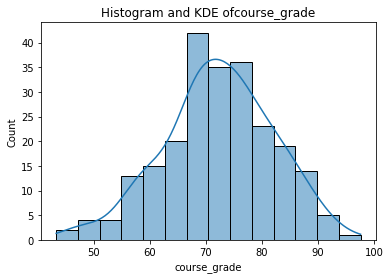

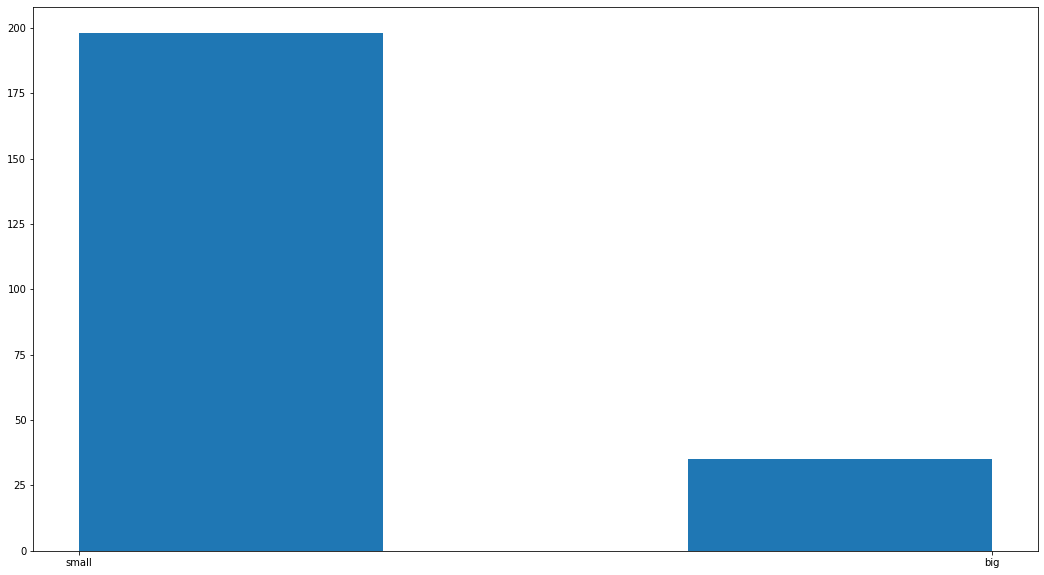

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import os                             # Library to do things on the filesystem
import pandas as pd                   # Super cool general purpose data handling library
import matplotlib.pyplot as plt
import math
from scipy.stats import lognorm
from sklearn import preprocessing

from sklearn.datasets import load_iris
from sklearn import datasets, linear_model, metrics
from sklearn import linear_model
import statsmodels.api as sm



data = pd.read_csv("https://raw.githubusercontent.com/Ahmad-Gill/123/main/exam_grades.csv")
print(data.head())
print(" \nfil the missing values using std method \n ")
data['exam1'] = data['exam1'].fillna(data['exam1'].std())
data['exam2'] = data['exam2'].fillna(data['exam2'].std())
data['exam3'] = data['exam3'].fillna(data['exam3'].std())
data['course_grade'] = data['course_grade'].fillna(data['course_grade'].std())
print("\nData types \n")
print("data type of  course_grade = ",type('course_grade'))
print("data type of  sex = ",type('sex'))
print("data type of  exam1 = ",type('exam1'))
print("data type of  exam2 = ",type('exam2'))
print("data type of  exam3 = ",type('exam3'))
print("data type of  semester = ",type('semester'))
print("\n derop dublicates on the basses of coursr grade \n  ")

data.drop_duplicates(subset = "course_grade", keep = 'first', inplace = True)
skewness = data['course_grade'].skew()
print("\n Histrogram to check skewness \n ")
#print('Skewness for course_grade  ',{skewness})
fig, ax = plt.subplots()
sns.histplot(data=data, x= 'course_grade' , kde=True)
ax.set_title('Histogram and KDE ofcourse_grade')
print("Thecourse_grade is fairly symmetrical as the skewness lies between -0.5 and 0.5")

#fig, ax = plt.subplots(figsize = (18,10))
plt.figure(figsize=(18,10))
print(" \n check the outliers ")
#sns.distplot(data['course_grade'])
#sns.boxplot(data['course_grade'])
print("\n remove the outliers \n")
upper_limit = data['exam1'].quantile(0.99)
lower_limit = data['exam1'].quantile(0.01)
new_df = data[(data['exam1'] <= 100.00) & (data['exam1'] >= 50.00)]
#sns.distplot(new_df['exam1'])
#sns.boxplot(new_df['exam1'])

upper_limit = data['exam3'].quantile(0.99)
lower_limit = data['exam3'].quantile(0.01)
new_df = data[(data['exam3'] <= 100.00) & (data['exam1'] >= 42.00)]
#sns.distplot(new_df['exam3'])
#sns.boxplot(new_df['exam3'])

upper_limit = data['course_grade'].quantile(0.99)
lower_limit = data['course_grade'].quantile(0.01)
new_df = data[(data['course_grade'] <= 100.00) & (data['exam1'] >= 42.00)]
#sns.distplot(new_df['course_grade'])
#sns.boxplot(new_df['course_grade'])


scaler = preprocessing.MinMaxScaler()
names = data.columns
d = scaler.fit_transform(data)
scaled_df = pd.DataFrame(d, columns=names)
print(scaled_df)

min_value = scaled_df['semester'].min()
max_value = scaled_df['semester'].max()
print(min_value)
print(max_value)
bins = np.linspace(min_value,max_value,4)



min_value = scaled_df['sex'].min()
max_value = scaled_df['sex'].max()
print(min_value)
print(max_value)

bins = np.linspace(min_value,max_value,4)
min_value = scaled_df['exam1'].min()
max_value = scaled_df['exam1'].max()
print(min_value)
print(max_value)
bins = np.linspace(min_value,max_value,4)

min_value = scaled_df['exam2'].min()
max_value = scaled_df['exam2'].max()
print(min_value)
print(max_value)
bins = np.linspace(min_value,max_value,4)


min_value = scaled_df['exam3'].min()
max_value = scaled_df['exam3'].max()
print(min_value)
print(max_value)
bins = np.linspace(min_value,max_value,4)


min_value = scaled_df['course_grade'].min()
max_value = scaled_df['course_grade'].max()
print(min_value)
print(max_value)
bins = np.linspace(min_value,max_value,4)
bins
labels = ['small', 'medium', 'big']
scaled_df['bins'] = pd.cut(scaled_df['semester'], bins=bins, labels=labels, include_lowest=True)
plt.hist(scaled_df['bins'], bins=3)


x = scaled_df[['exam1','exam2','exam3']]
y = scaled_df['course_grade']
regr = linear_model.LinearRegression()
regr.fit(x, y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)